# Take Home Challenge
## Relax Inc.

<b> Objective:</b> Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period, identify which factors predict future user adoption.

In [94]:
import pandas as pd
import numpy as np
import datetime
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1: Create Active User Function

In [96]:
def active_users(period, days_logged, user):

    import pandas as pd
    from pandas import DataFrame, Series

    visited = len(user.index) #get the number of times the user logged in
    i, count = 0, 1
    active_user = False

    while count < days_logged:
        if (i+2) < visited: #needs to be at least 3 entries left	
            if (user['time_stamp'].iloc[i + 1] - user['time_stamp'].iloc[i]) <= pd.Timedelta(days=period) and (user['time_stamp'].iloc[i + 1] - user['time_stamp'].iloc[i]) > pd.Timedelta(days=1) :
                count += 1 #logged in twice within a 7 day period
                new_timeframe = pd.Timedelta(days=7) - ((user['time_stamp'].iloc[i + 1] - user['time_stamp'].iloc[i]))
                if (user['time_stamp'].iloc[i + 2] - user['time_stamp'].iloc[i + 1]) <= new_timeframe and (user['time_stamp'].iloc[i + 2] - user['time_stamp'].iloc[i + 1]) > pd.Timedelta(days=1):
                    active_user = True #they logged in three times within a 7 period window
                    count += 1
                else: 
                    i += 1
                    count = 1
            else:
                i += 1
                count = 1
        else:
            count = days_logged
    return active_user

## Step 2: Import users dataset

In [107]:
df_user = pd.read_csv('/Users/colinechabloz/Desktop/relax_challenge/takehome_users.csv', encoding = "ISO-8859-1")

In [108]:
df_user.shape

(12000, 10)

In [109]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


A user table ("takehome_users") with data on 12,000 users who signed up for the product in the last two years. This table includes:

- **name:** the user's name
- **object_id:** the user's id
- **email:** email address
- **creation_source:** how their account was created. This takes on one of 5 values:
    - **PERSONAL_PROJECTS:** invited to join another user's personal workspace
    - **GUEST_INVITE:** invited to an organization as a guest (limited permissions)
    - **ORG_INVITE:** invited to an organization (as a full member)
    - **SIGNUP:** signed up via the website
    - **SIGNUP_GOOGLE_AUTH:** signed up using Google Authentication (using a Google email account for their login id)
- **creation_time:** when they created their account
- **last_session_creation_time:** unix timestamp of last login
- **opted_in_to_mailing_list:** whether they have opted into receiving marketing emails
- **enabled_for_marketing_drip:** whether they are on the regular marketing email drip
- **org_id:** the organization (group of users) they belong to
- **invited_by_user_id:** which user invited them to join (if applicable)

## Step 3: Import engagement dataset

In [97]:
df_eng = pd.read_csv('/Users/colinechabloz/Desktop/relax_challenge/takehome_user_engagement.csv')

In [98]:
df_eng.shape

(207917, 3)

In [99]:
df_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [100]:
df_eng['time_stamp'] = pd.to_datetime(df_eng.time_stamp)

In [101]:
df3 = df_eng.groupby('user_id').filter(lambda x: (len(x) > 2) & (active_users(period=7, days_logged=3, user=x) ==True))

In [102]:
# Now we can create our labels with these unique users that logged in 3 times or more within 7 days
unique_users = df3.user_id.unique()
unique_users

array([    2,    10,    33, ..., 11969, 11975, 11988])

A usage summary table ("takehome_user_engagement") that has a row for each day that a user logged into the product.

## Step 4: Create "adopted_user" label

In [110]:
df_user['adopted_user'] = df_user.object_id.isin(unique_users)

In [111]:
df_user.adopted_user.value_counts(1)

False    0.875583
True     0.124417
Name: adopted_user, dtype: float64

In [112]:
df_user.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted_user                     bool
dtype: object

In [113]:
# Convert the boolean label into an int
df_user.adopted_user = df_user.adopted_user.astype(int)

In [114]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


**Conclusion:**
- About 88% of the users are not adopted users
- About 12% of the users are adopted users

## Step 5: Explore correlation between variables and "adopted_user"
### Explore "Creation Source" variable

In [115]:
df_user.creation_source.value_counts(1)

ORG_INVITE            0.354500
GUEST_INVITE          0.180250
PERSONAL_PROJECTS     0.175917
SIGNUP                0.173917
SIGNUP_GOOGLE_AUTH    0.115417
Name: creation_source, dtype: float64

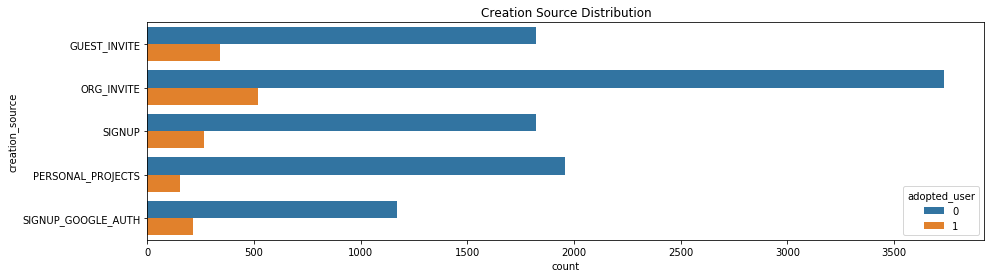

In [116]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="creation_source", hue='adopted_user', data=df_user).set_title('Creation Source Distribution');

**Observation:** Adopted Users were mostly invited by Org_Invite and Guest_Invite

### Explore "Marketing Drip" variable

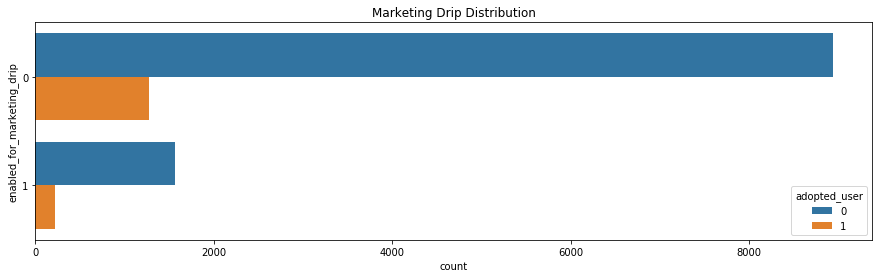

In [117]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="enabled_for_marketing_drip", hue='adopted_user', data=df_user).set_title('Marketing Drip Distribution');

**Observation:** the proportion of adopted_user is higher for those who unabled marketing emails.

## Explore Mailing List Opt

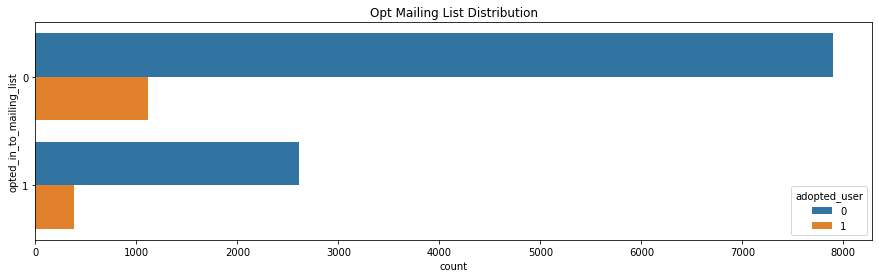

In [118]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="opted_in_to_mailing_list", hue='adopted_user', data=df_user).set_title('Opt Mailing List Distribution');

**Observation:** the proportion of adopted_user is higher for those who didn't sign up for the mailing list.